# OOP design for a simple heuristic solver for Frasers Capstone project

Author: Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

Version: v1.0 (10/06/2021)

A simple "evolutionary" algorithm demo for the Y2021 Capstone Frasers students.

### Imports and requirements

In [1]:
# Core packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Custom packages
# - GJK is used to check collisions between polygons (Source: https://github.com/Wopple/GJK)
import gjk

### Playing with building shapes

Defining a Shape superclass and a Rectangular_Shape child class.

In [2]:
# Shape superclass
class Shape():
    
    def __init__(self, x_pos, y_pos, theta = np.pi/2):
        """
        Constructor method for Shape objects.
        """
        
        # Initialize positions
        self._x_pos = x_pos
        self._y_pos = y_pos
        self._theta = theta % (2*np.pi)
        self._corners_list = []
        
        
    def check_intersect(self, other):
        """
        Check for collision between polygons
        """
        return gjk.collidePolyPoly(tuple(self._corners_list), tuple(other._corners_list))
    
    
    """
    Property for x_pos
    """
    def set_x_pos(self, pos):
        self._x_pos = pos
    def get_x_pos(self):
        return self._x_pos
    x_pos = property(get_x_pos, set_x_pos)

    
    """
    Property for y_pos
    """
    def set_y_pos(self, pos):
        self._y_pos = pos
    def get_y_pos(self):
        return self._y_pos
    y_pos = property(get_y_pos, set_y_pos)

    
    """
    Property for theta
    """
    def set_theta(self, theta):
        self._theta = theta
    def get_theta(self):
        return self._theta
    theta = property(get_theta, set_theta)

In [3]:
# Ractangular_Shape child class
class Rectangular_Shape(Shape):
    
    def __init__(self, x_pos, y_pos, length, width, theta = np.pi/2):
        """
        Constructor method for Rectangular_Shape objects.
        """
        
        # Initialize with motherclass
        self._type = "Rectangular"
        super().__init__(x_pos, y_pos, theta)
        
        # Initialize dimensions
        if length < width:
            length, width = width, length
        self._length = length
        self._width = width
        
        # Update corners
        self.update_corners_list()
    
    
    def update_corners_list(self):
        """
        Update method for corners list.
        """
        
        # Diagonal value and arctan value
        d = np.sqrt((self.width/2)**2 + (self.length/2)**2)
        t = np.arctan(self.length/self.width)
        
        # Corner 1
        theta1 = (t + self.theta) % (2*np.pi)
        x1 = round(self.x_pos + d*np.cos(theta1), 5)
        y1 = round(self.y_pos + d*np.sin(theta1), 5)

        # Corner 2
        theta2 = (-t + self.theta) % (2*np.pi)
        x2 = round(self.x_pos + d*np.cos(theta2), 5)
        y2 = round(self.y_pos + d*np.sin(theta2), 5)

        # Corner 3
        theta3 = (t + self.theta - np.pi) % (2*np.pi)
        x3 = round(self.x_pos + d*np.cos(theta3), 5)
        y3 = round(self.y_pos + d*np.sin(theta3), 5)

        # Corner 4
        theta4 = (-t + self.theta - np.pi) % (2*np.pi)
        x4 = round(self.x_pos + d*np.cos(theta4), 5)
        y4 = round(self.y_pos + d*np.sin(theta4), 5)

        # Assemble
        self._corners_list = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        
        
    """
    Property for length
    """
    def set_length(self, length):
        self._length = length
    def get_length(self):
        return self._length
    length = property(get_length, set_length)

    
    """
    Property for width
    """
    def set_width(self, width):
        self._width = width
    def get_width(self):
        return self._width
    width = property(get_width, set_width)

In [4]:
# Check the collision happens
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
print(b1.__dict__)
b2 = Rectangular_Shape(0, 0, 20, 10, 0)
print(b2.__dict__)
print(b1.check_intersect(b2))

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-10.0, 5.0), (10.0, 5.0), (10.0, -5.0), (-10.0, -5.0)], '_length': 20, '_width': 10}
{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 0.0, '_corners_list': [(5.0, 10.0), (5.0, -10.0), (-5.0, -10.0), (-5.0, 10.0)], '_length': 20, '_width': 10}
True


In [5]:
# Check for no collision
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
print(b1.__dict__)
b2 = Rectangular_Shape(20, 50, 20, 10, 0)
print(b2.__dict__)
print(b1.check_intersect(b2))

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-10.0, 5.0), (10.0, 5.0), (10.0, -5.0), (-10.0, -5.0)], '_length': 20, '_width': 10}
{'_type': 'Rectangular', '_x_pos': 20, '_y_pos': 50, '_theta': 0.0, '_corners_list': [(25.0, 60.0), (25.0, 40.0), (15.0, 40.0), (15.0, 60.0)], '_length': 20, '_width': 10}
False


### 

### Defining the Rectangular Environment class (only acceptable one for now)

In [6]:
# Rectangular environment class, as a Rectangular_Shape sublass
class Rectangular_Environment(Rectangular_Shape):
    
    def __init__(self, x_pos, y_pos, length, width):
        """
        Constructor method for Rectangular_Environment objects.
        """
        
        # Initialize Environment as Rectangular
        super().__init__(x_pos, y_pos, length, width)
        
        # Define list of buildings as empty for now
        self.buildings_list = []
        
        # Define solver and performance criterion for current environment, set as None for now
        self.solver = None
        self.valid = False
        self.perf = None
        
        
    def add_building(self, building):
        """
        Add building method (no remove building method yet)
        """
        
        self.buildings_list.append(building)
        
    def add_solver(self, solver):
        """
        Add solver to environment (after environment has been initialized).
        """
        
        self.solver = solver
    
    
    def run_solver(self):
        """
        Run solver and get suggested design
        """
        
        self.valid, self.perf, self.buildings_list = self.solver.run()
        print("Final: ", [(b.x_pos, b.y_pos) for b in self.buildings_list])
        
    def display_environment(self):
        # Initialize figure
        plt.figure()

        # Display environment (blue)
        coords_env = self._corners_list + [self._corners_list[0]]
        env_x_coords = [coord[0] for coord in coords_env]
        env_y_coords = [coord[1] for coord in coords_env]
        plt.plot(env_x_coords, env_y_coords)

        # Display buildings (in red)
        for index, b in enumerate(self.buildings_list):
            coords_b = b._corners_list + [b._corners_list[0]]
            b_x_coords = [coord[0] for coord in coords_b]
            b_y_coords = [coord[1] for coord in coords_b]
            plt.plot(b_x_coords, b_y_coords, color = "red")
        
        # Display
        title_str = "Showing current best candidate "
        title_str += "found by {}.\n".format(self.solver.solver_name)
        title_str += "(Valid: {}, Perf: {})".format(self.valid, self.perf)
        plt.title(title_str)
        #plt.show()

In [7]:
e = Rectangular_Environment(0, 0, 100, 50)
b1 = Rectangular_Shape(-39, -19, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(-34, 9, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(25, 11, 25, 15, 0)
e.add_building(b3)
print(e.__dict__)

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], '_length': 100, '_width': 50, 'buildings_list': [<__main__.Rectangular_Shape object at 0x0000017EC5AF8340>, <__main__.Rectangular_Shape object at 0x0000017EC5AF8CD0>, <__main__.Rectangular_Shape object at 0x0000017EC5AFBD30>], 'solver': None, 'valid': False, 'perf': None}


### A first solver: random movements of centers for rectangles

This first solver attempts to move buildings in the rectangular environment (keeping them in!), and brings them closer together. The objective is to minimize the distance between the centroids of the buildings (sum over all the possible pairs of buildings).

It will do so by moving the buildings centroids randomly in space (our mutation process to create a new candidate), and will only accept a new candidate if and only if it satisfies two conditions:
- the buildings are still in the rectangular environment (constraint satisfied),
- the buildings are closer together than the previous design (improvement on objective/performance function).

In [8]:
# Solver superclass
class Solver():
    
    def __init__(self, environment, solver_name = "Solver"):
        """
        Constructor method for Solver objects.
        """
        
        # Just a solver name attribute for now
        self.solver_name = solver_name

In [9]:
# Random_Movement_Solver child class
class Random_Movement_Solver(Solver):
    
    def __init__(self, environment, iterations = 1000):
        """
        Constructor method for Random_Movement_Solver objects.
        """
        
        # Reuse superclass
        super().__init__(environment, solver_name = "Random Movement Solver")
        
        # Initialize number of iterations
        self.iterations = iterations
        
        # Retrieve buildings list
        self.buildings_list = deepcopy(environment.buildings_list)
        
        # Retrieve environment shape
        self.environment_shape = deepcopy(environment._corners_list)
        
        # Retrieve environment size for mutation scheduler in mutate_building()
        # and random_step() methods
        # NOTE: Will only work with Rectangular_Shape environments.
        self.environment_size = environment.length
        
        # Initialize performance and validity criterions
        self.valid = self.check_validity(buildings_list = self.buildings_list)
        if self.valid:
            self.perf = self.perf_criterion(buildings_list = self.buildings_list)
        else:
            self.perf = np.inf
        
    
    def check_for_collisions_buildings(self, buildings_list):
        """
        Check for collisions between buildings in buildings_list.
        """
        
        # Compute number of buildings
        buildings_number = len(buildings_list)
        
        # Check for collision between all pairs of buildings
        for b1_index in range(buildings_number):
            b1 = buildings_list[b1_index]
            for b2_index in range(b1_index + 1, buildings_number):
                b2 = buildings_list[b2_index]
                intersect = b1.check_intersect(b2)
                if intersect:
                    return True
        return False
    
    
    def check_for_collisions_env(self, buildings_list):
        """
        Check for collisions between buildings in buildings_list and environment.
        NOTE: Will only work with Rectangular_Shape environments.
        """
        
        # Find env_min_x, env_max_x, env_min_y, env_max_y
        if not all([hasattr(self, "env_min_x"), hasattr(self, "env_max_x"), \
                    hasattr(self, "env_min_y"), hasattr(self, "env_max_y")]):
            self.env_min_x = min([coord[0] for coord in self.environment_shape])
            self.env_max_x = max([coord[0] for coord in self.environment_shape])
            self.env_min_y = min([coord[1] for coord in self.environment_shape])
            self.env_max_y = max([coord[1] for coord in self.environment_shape])
        
        for b in buildings_list:
            for coord in b._corners_list:
                x, y = coord
                if any([x < self.env_min_x, x > self.env_max_x, y < self.env_min_y, y > self.env_max_y]):
                    return True
        return False
        
        
    def check_validity(self, buildings_list):
        """
        Check for validity of current layout in buildings_list.
        NOTE: Will only work with Rectangular_Shape environments.
        """
        
        check1 = not self.check_for_collisions_buildings(buildings_list = buildings_list)
        check2 = not self.check_for_collisions_env(buildings_list = buildings_list)
        return check1 and check2
    
    
    def mutate_building(self, b, iter_num):
        """
        Mutate building by moving its centroid randomly in space
        It choose direction and step randomly with uniform distribution.
        """
        
        # Random angle
        random_angle = 2*np.pi*np.random.random()
        
        # Random step value (follows a scheduler based on iterations)
        random_step = self.random_step(iter_num)
        
        # Adjust centroid coordinates for building
        b.x_pos = b.x_pos + random_step*np.cos(random_angle)
        b.y_pos = b.y_pos + random_step*np.sin(random_angle)
        
        # Update corners list
        b.update_corners_list()
        
        return b
        
    
    def random_step(self, iter_num):
        """
        Random step calculator for mutation, includes simple decay.
        """
        
        # Define max stepdecay_rate
        decay_rate = int(self.iterations/5)
        power = iter_num // decay_rate
        max_step = self.environment_size/(2**power)
        random_step = max_step*np.random.random()
        return random_step
    
    
    def perf_criterion(self, buildings_list):
        """
        Performance criterion will be the sum of distances between the centroids of the three buildings.
        
        NOTE: this only works with three buildings in the environment,
        to be replaced with general formula for area of polygons?
        Or another performance criterion.
        """
        
        A = np.array((buildings_list[0].x_pos, buildings_list[0].y_pos))
        B = np.array((buildings_list[1].x_pos, buildings_list[1].y_pos))
        C = np.array((buildings_list[2].x_pos, buildings_list[2].y_pos))
        a = np.linalg.norm(A - B)
        b = np.linalg.norm(B - C)
        c = np.linalg.norm(A - C)
        
        # Previous version was using Heron's formula
        #s = (a+b+c)/2
        #val = np.sqrt(s*(s-a)*(s-b)*(s-c)) # Unstable formula
        #l = [a,b,c]
        #l.sort()
        #a, b, c = l[0], l[1], l[2]
        #val = 1/4*np.sqrt((a+b+c)*(c-a+b)*(c+a-b)*(a+b-c)) # v2, still unstable
        
        val = a + b + c
        return val
    
        
    def run(self):
        """
        Run the solver by performing iterations until the maximal number of iterations is reached.
        NOTE: The current solver design:
        - will mutate all buildings if no valid design has been found yet,
        - will mutate only one building at a time if a valid design has been found,
        - will mutate building by moving their centroid, but not rotate them,
        - will accept a mutation as the new best candidate if it is a valid design (in terms and constraints)
        and it performs better than the previous best candidate in terms of objective/performance function.
        """
        
        for iter_num in range(self.iterations):
            
            # Display
            print("---")
            print("Iteration: ", iter_num)
            print("Current coords: ", [(b.x_pos, b.y_pos) for b in self.buildings_list])
            print("Current validity: ", self.valid)
            print("Current perf: ", self.perf)
            
            # Mutate (all buildings if invalid design is current candidate,
            # only one building otherwise)
            buildings_list_new = deepcopy(self.buildings_list)
            if not self.valid:
                for b in buildings_list_new:
                    b = self.mutate_building(b, iter_num)
            else:
                b = np.random.choice(buildings_list_new)
                b = self.mutate_building(b, iter_num)
                
            # Display
            print("Proposed mutation: ", [(b.x_pos, b.y_pos) for b in buildings_list_new])
            
            # Check for validity and compute perf criterion if needed.
            # Update best candidate if improvement
            new_valid = self.check_validity(buildings_list = buildings_list_new)
            if not new_valid:
                print("New design is invalid.")
                continue
            elif not self.valid:
                self.buildings_list = buildings_list_new
                new_perf = self.perf_criterion(self.buildings_list)
                self.perf = new_perf
                print("Accepted mutation, first valid design.")
            else:
                new_perf = self.perf_criterion(buildings_list_new)
                if new_perf < self.perf:
                    self.perf = new_perf
                    self.buildings_list = buildings_list_new
                    print("Accepted mutation, found a better valid design.")
                else:
                    print("Rejected mutation, proposed design was valid but not better.")
                    
            
        return self.valid, self.perf, self.buildings_list

In [10]:
rms = Random_Movement_Solver(e)
print(rms.__dict__)

{'solver_name': 'Random Movement Solver', 'iterations': 1000, 'buildings_list': [<__main__.Rectangular_Shape object at 0x0000017EC5B2E7F0>, <__main__.Rectangular_Shape object at 0x0000017EC5B2E820>, <__main__.Rectangular_Shape object at 0x0000017EC5B2E700>], 'environment_shape': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], 'environment_size': 100, 'env_min_x': -50.0, 'env_max_x': 50.0, 'env_min_y': -25.0, 'env_max_y': 25.0, 'valid': True, 'perf': 158.15920206752673}


In [11]:
rms.run()

---
Iteration:  0
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(6.958892553974422, -36.05325726995699), (-34, 9), (25, 11)]
New design is invalid.
---
Iteration:  1
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-3.2792792978541527, -73.06986195547519), (25, 11)]
New design is invalid.
---
Iteration:  2
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(14.280213488312526, -87.36911291166415), (-34, 9), (25, 11)]
New design is invalid.
---
Iteration:  3
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-34, 9), (-20.639151291022472, -48.722155285330295)]
New design is invalid.
---
Iteration:  4
Current coords:  [(-39, -19), (-34, 9), (25, 11)

---
Iteration:  50
Current coords:  [(-37.556877919345716, -15.266526328877035), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  69.46441458007233
Proposed mutation:  [(-110.5339594842533, -74.92279776079508), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  51
Current coords:  [(-37.556877919345716, -15.266526328877035), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  69.46441458007233
Proposed mutation:  [(-37.556877919345716, -15.266526328877035), (55.43636130055829, -50.73796018224969), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  52
Current coords:  [(-37.556877919345716, -15.266526328877035), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  69.464

Proposed mutation:  [(-84.70293716269707, -69.53814620559406), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  88
Current coords:  [(-37.556877919345716, -15.266526328877035), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  69.46441458007233
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Accepted mutation, found a better valid design.
---
Iteration:  89
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-33.40763315258096, -33.19814160363205), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  

Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-82.37605266408754, 18.428306308794927)]
New design is invalid.
---
Iteration:  142
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-29.74958244890218, -41.083444147101105)]
New design is invalid.
---
Iteration:  143
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-49.28575904083897, -19.144764848005707)]
New d

---
Iteration:  201
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (15.952788324809124, -13.82607827848258)]
New design is invalid.
---
Iteration:  202
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-53.942781424485304, -4.917190121850435)]
New design is invalid.
---
Iteration:  203
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.462

Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-16.067492663644472, -10.442944117954871)]
New design is invalid.
---
Iteration:  239
Current coords:  [(-29.86785507995797, -18.933051807692973), (-24.695367287585228, 5.031090147529056), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  65.46237005628332
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Accepted mutation, found a better valid design.
---
Iteration:  240
Current coords:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  64.70938080538883
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-4.3910628323396494,

Iteration:  289
Current coords:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  64.70938080538883
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-68.77669929228084, 22.817637077769177), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  290
Current coords:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  64.70938080538883
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-15.201019607095496, 7.823331830945944)]
New design is invalid.
---
Iteration:  291
Current coords:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  64.7093808

Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-22.45929197021938, -23.462883638305172), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  349
Current coords:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  64.70938080538883
Proposed mutation:  [(-44.826444709798366, -53.71442750726912), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  350
Current coords:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  64.70938080538883
Proposed mutation:  [(-29.86785507995797, -18.933051807692973), (-23.560269143504033, 5.009642059680879), (13.526647675540246, -13.115833737231728)]
New design is invalid.
---
Iteration:  351
Current coords:  

---
Iteration:  385
Current coords:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  60.715413003340856
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (5.128335709650962, 15.97770246475758), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  386
Current coords:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  60.715413003340856
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (0.5437627788751804, 0.38965701714936873), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  387
Current coords:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  60.7

Rejected mutation, proposed design was valid but not better.
---
Iteration:  434
Current coords:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  60.715413003340856
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-17.509004006895147, 10.306512163993151)]
New design is invalid.
---
Iteration:  435
Current coords:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  60.715413003340856
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-19.544053387971143, -7.255165222572945)]
New design is invalid.
---
Iteration:  436
Current coords:  [(-29.05679510910269, -17.087712511396195), (-25.744756861319683, 3.810795553191717), (-10.811194197600454, -2

Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-27.204353869660114, -16.57667137279835)]
New design is invalid.
---
Iteration:  495
Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-44.02020098648693, 11.705419293271985), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  496
Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-44.027371098026414, 9.217975093544196), (-10.811194197600454, -2.570869777573619)]
Rejected mutation, proposed design was valid but not better.


Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-34.6554070786517, -13.232157742689138), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  532
Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-1.11580559821582, 14.057016986709417)]
New design is invalid.
---
Iteration:  533
Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed 

Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed mutation:  [(-47.50632745256354, -8.50862724272196), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  575
Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed mutation:  [(-29.05679510910269, -17.087712511396195), (-30.87114962386888, 1.8486495325400867), (-10.811194197600454, -2.570869777573619)]
New design is invalid.
---
Iteration:  576
Current coords:  [(-29.05679510910269, -17.087712511396195), (-26.00036716885614, 3.1297114827393373), (-10.811194197600454, -2.570869777573619)]
Current validity:  True
Current perf:  59.98692849965845
Proposed 

Rejected mutation, proposed design was valid but not better.
---
Iteration:  633
Current coords:  [(-24.010107792568444, -17.05723995564635), (-26.00036716885614, 3.1297114827393373), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.909376218369815
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-30.561260599198395, 10.126949759140556), (-12.667304093680105, 0.7016676243713347)]
New design is invalid.
---
Iteration:  634
Current coords:  [(-24.010107792568444, -17.05723995564635), (-26.00036716885614, 3.1297114827393373), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.909376218369815
Proposed mutation:  [(-20.219887452697293, -26.733311664039825), (-26.00036716885614, 3.1297114827393373), (-12.667304093680105, 0.7016676243713347)]
New design is invalid.
---
Iteration:  635
Current coords:  [(-24.010107792568444, -17.05723995564635), (-26.00036716885614, 3.1297114827393373), (-12.667304093680105, 

Iteration:  673
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.298628592367063, 3.5426590688983715), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.65924285383754
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-25.298628592367063, 3.5426590688983715), (-15.054549231418964, 4.800371862089198)]
New design is invalid.
---
Iteration:  674
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.298628592367063, 3.5426590688983715), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.65924285383754
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-25.298628592367063, 3.5426590688983715), (-14.076139880209885, 1.2791757142969717)]
New design is invalid.
---
Iteration:  675
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.298628592367063, 3.5426590688983715), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.65

Current perf:  54.61245375515108
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-2.1655482915796522, -3.616797514025909)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  726
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.61245375515108
Proposed mutation:  [(-24.20401861005111, -8.780984509561383), (-25.320867148684446, 3.4851357637367157), (-12.667304093680105, 0.7016676243713347)]
New design is invalid.
---
Iteration:  727
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.61245375515108
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-17.92818410462129, -1.2043923826557141), (-12.667304093680105, 0.70166

Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-34.97454697846146, 1.8808843653913332), (-12.667304093680105, 0.7016676243713347)]
New design is invalid.
---
Iteration:  783
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.61245375515108
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-9.488751253565825, 2.2225984096069276)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  784
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-12.667304093680105, 0.7016676243713347)]
Current validity:  True
Current perf:  54.61245375515108
Proposed mutation:  [(-24.321412448037485, -17.349562236141953), (-25.320867148684446, 3.4851357637367157), (-12.667304093680105, 0.7016676243713347)]
Rejected mutation, 

Rejected mutation, proposed design was valid but not better.
---
Iteration:  818
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  54.597370754144464
Proposed mutation:  [(-24.010107792568444, -17.05723995564635), (-23.24357873932129, 1.2387541562839246), (-12.678412507920015, 0.7044429401378312)]
New design is invalid.
---
Iteration:  819
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  54.597370754144464
Proposed mutation:  [(-18.065067905020754, -18.526380460335737), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  820
Current coords:  [(-24.010107792568444, -17.05723995564635), (-25.320867148684446, 3.

Proposed mutation:  [(-17.314241879150558, -16.5776880661914), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
New design is invalid.
---
Iteration:  866
Current coords:  [(-18.228512990311458, -16.972096653555607), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  53.12381036374708
Proposed mutation:  [(-18.228512990311458, -16.972096653555607), (-25.320867148684446, 3.4851357637367157), (-7.302942641319775, 3.2180376150015793)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  867
Current coords:  [(-18.228512990311458, -16.972096653555607), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  53.12381036374708
Proposed mutation:  [(-18.294590987291155, -16.89545056129258), (-25.320867148684446, 3.4851357637367157), (-12.678412507920015, 0.7044429401378312)]
Accepted mutation

Rejected mutation, proposed design was valid but not better.
---
Iteration:  927
Current coords:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  52.410006720416
Proposed mutation:  [(-18.495811488548238, -22.513130410274865), (-25.194812082474655, 3.1349086269982678), (-12.678412507920015, 0.7044429401378312)]
New design is invalid.
---
Iteration:  928
Current coords:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  52.410006720416
Proposed mutation:  [(-18.294590987291155, -16.89545056129258), (-24.826812548448345, 4.735117166079773), (-12.678412507920015, 0.7044429401378312)]
New design is invalid.
---
Iteration:  929
Current coords:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-12.678412507920015, 0.7

Proposed mutation:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-9.805863408076064, -3.255416073242267)]
New design is invalid.
---
Iteration:  961
Current coords:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  52.410006720416
Proposed mutation:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-11.29823878566907, -5.268707244838726)]
New design is invalid.
---
Iteration:  962
Current coords:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-12.678412507920015, 0.7044429401378312)]
Current validity:  True
Current perf:  52.410006720416
Proposed mutation:  [(-18.294590987291155, -16.89545056129258), (-25.194812082474655, 3.1349086269982678), (-12.523107430894655, -0.0832334047486788)]
New design is invalid.
---
Iteration:  963
Current coords:  [

(True,
 52.410006720416,
  <__main__.Rectangular_Shape at 0x17ec5b4d370>])

### Testing our solver on rectangular environment

In [12]:
# Initialize environment
e = Rectangular_Environment(0, 0, 100, 50)

# Add buildings
b1 = Rectangular_Shape(-35, -17, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(0, 5, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(21, 7, 25, 15, np.pi/4)
e.add_building(b3)

# Add solver
rms = Random_Movement_Solver(e, iterations = 10000)
e.add_solver(rms)

# Display
print(e.__dict__)

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], '_length': 100, '_width': 50, 'buildings_list': [<__main__.Rectangular_Shape object at 0x0000017EC5B3ACA0>, <__main__.Rectangular_Shape object at 0x0000017EC5AF8340>, <__main__.Rectangular_Shape object at 0x0000017EC5AF8CD0>], 'solver': <__main__.Random_Movement_Solver object at 0x0000017EC5AFBD30>, 'valid': False, 'perf': None}


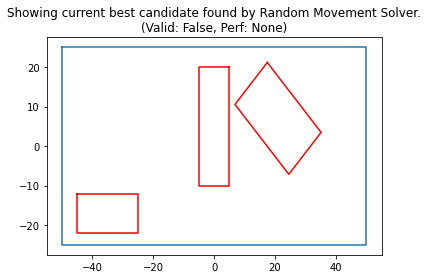

In [13]:
# Display (initial)
e.display_environment()

In [14]:
# Run solver (this take a long time, 100000 iterations!)
e.run_solver()

---
Iteration:  0
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (0, 5), (-33.169102339577435, 66.80311957868469)]
New design is invalid.
---
Iteration:  1
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (35.6158803190713, -58.64160466766754), (21, 7)]
New design is invalid.
---
Iteration:  2
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (0, 5), (52.47867719927064, 47.72819739669864)]
New design is invalid.
---
Iteration:  3
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-34.60056665010547, 36.26708999073331), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  4
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Cu

Accepted mutation, found a better valid design.
---
Iteration:  37
Current coords:  [(31.427858752703102, -19.6383925373312), (0, 5), (21, 7)]
Current validity:  True
Current perf:  89.63619397507914
Proposed mutation:  [(58.90823293495917, 4.025384207598883), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  38
Current coords:  [(31.427858752703102, -19.6383925373312), (0, 5), (21, 7)]
Current validity:  True
Current perf:  89.63619397507914
Proposed mutation:  [(67.6690230996268, -103.28479524330669), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  39
Current coords:  [(31.427858752703102, -19.6383925373312), (0, 5), (21, 7)]
Current validity:  True
Current perf:  89.63619397507914
Proposed mutation:  [(78.23787682506327, -55.422932388357005), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  40
Current coords:  [(31.427858752703102, -19.6383925373312), (0, 5), (21, 7)]
Current validity:  True
Current perf:  89.63619397507914
Proposed mutation:  [(31.4278587527031

Proposed mutation:  [(-10.387206641477299, 5.853998262252444), (1.0422843984269647, 8.107650789145504), (21, 7)]
New design is invalid.
---
Iteration:  144
Current coords:  [(-14.810529375853108, 5.254654783710432), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  71.94895771829547
Proposed mutation:  [(-14.810529375853108, 5.254654783710432), (-19.659942420013955, -53.28617506637417), (21, 7)]
New design is invalid.
---
Iteration:  145
Current coords:  [(-14.810529375853108, 5.254654783710432), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  71.94895771829547
Proposed mutation:  [(-14.810529375853108, 5.254654783710432), (1.0422843984269647, 8.107650789145504), (101.64403165371854, -10.289513905032695)]
New design is invalid.
---
Iteration:  146
Current coords:  [(-14.810529375853108, 5.254654783710432), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  71.9489577182

Proposed mutation:  [(-9.444690206001992, 7.110923380276913), (1.0422843984269647, 8.107650789145504), (21, 7)]
New design is invalid.
---
Iteration:  182
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (38.04409080604888, -24.882429787120415)]
New design is invalid.
---
Iteration:  183
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(-19.525118879716857, -8.022751543536042), (1.0422843984269647, 8.107650789145504), (21, 7)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  184
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  Tr

Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (37.481982866731954, -7.254685505973674)]
New design is invalid.
---
Iteration:  299
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (99.8732007591589, 66.88981684419119)]
New design is invalid.
---
Iteration:  300
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(61.17958023578096, 3.7622999733758187), (1.0422843984269647, 8.107650789145504), (21, 7)]
New design is inv

Proposed mutation:  [(-19.239439666436066, 10.566004724824094), (1.0422843984269647, 8.107650789145504), (21, 7)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  331
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(48.42461708506386, 21.497801905868545), (1.0422843984269647, 8.107650789145504), (21, 7)]
New design is invalid.
---
Iteration:  332
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  True
Current perf:  70.79018953239401
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (10.043634415053697, 13.934464250820373)]
New design is invalid.
---
Iteration:  333
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (21, 7)]
Current validity:  Tr

Current perf:  69.34767737211592
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (-60.394411975805575, 48.683667334881974), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  435
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  69.34767737211592
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (22.350166378588604, -25.879740293886492)]
New design is invalid.
---
Iteration:  436
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  69.34767737211592
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (-65.43786565637518, 33.81866517017415), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  437
Curren

Current perf:  69.34767737211592
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (47.28232591703024, -8.88901202212726), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  471
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  69.34767737211592
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (37.31324284794799, 25.541650843832144)]
New design is invalid.
---
Iteration:  472
Current coords:  [(-14.364449530393232, 8.40175381520385), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  69.34767737211592
Proposed mutation:  [(-14.364449530393232, 8.40175381520385), (18.483453646157436, 15.155088956566793), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  473
Current co

Iteration:  576
Current coords:  [(10.706535443873781, -14.517530948654791), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.69825230051607
Proposed mutation:  [(36.31133318232228, 21.396222405769958), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  577
Current coords:  [(10.706535443873781, -14.517530948654791), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.69825230051607
Proposed mutation:  [(10.706535443873781, -14.517530948654791), (-43.38463163425622, 18.000755393368767), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  578
Current coords:  [(10.706535443873781, -14.517530948654791), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.69825230051607
Propose

Current validity:  True
Current perf:  67.69825230051607
Proposed mutation:  [(96.3391123898432, -44.836101326002535), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  612
Current coords:  [(10.706535443873781, -14.517530948654791), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.69825230051607
Proposed mutation:  [(10.706535443873781, -14.517530948654791), (-42.93376944172932, 20.173194911331194), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  613
Current coords:  [(10.706535443873781, -14.517530948654791), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.69825230051607
Proposed mutation:  [(10.706535443873781, -14.517530948654791), (1.0422843984269647, 8.107650789145504), (-17.419990789615202, -27.369695254057362)]
New design is inv

Current validity:  True
Current perf:  67.20751958143035
Proposed mutation:  [(-29.88514553121498, -46.4985737476658), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  718
Current coords:  [(11.353450709962651, -14.24525741813703), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.20751958143035
Proposed mutation:  [(17.395312535825205, -29.639418916646168), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  719
Current coords:  [(11.353450709962651, -14.24525741813703), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.20751958143035
Proposed mutation:  [(11.353450709962651, -14.24525741813703), (1.0422843984269647, 8.107650789145504), (19.424860867768768, 42.673932387879844)]
New design is invalid.


Current validity:  True
Current perf:  67.20751958143035
Proposed mutation:  [(11.353450709962651, -14.24525741813703), (-37.31548523739148, 5.405109510058683), (20.290771005987462, 7.300220627077687)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  751
Current coords:  [(11.353450709962651, -14.24525741813703), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.20751958143035
Proposed mutation:  [(11.353450709962651, -14.24525741813703), (1.0422843984269647, 8.107650789145504), (24.096301147655772, 5.011742077316844)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  752
Current coords:  [(11.353450709962651, -14.24525741813703), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  67.20751958143035
Proposed mutation:  [(11.353450709962651, -14.24525741813703), (-5.16968995206363, 1.98954102

Iteration:  858
Current coords:  [(13.374196802086669, -13.232237291434432), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  65.57837907570338
Proposed mutation:  [(13.374196802086669, -13.232237291434432), (57.30427383370208, -0.9462475271848199), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  859
Current coords:  [(13.374196802086669, -13.232237291434432), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  65.57837907570338
Proposed mutation:  [(13.374196802086669, -13.232237291434432), (1.0422843984269647, 8.107650789145504), (57.64605963245259, 34.55849149409483)]
New design is invalid.
---
Iteration:  860
Current coords:  [(13.374196802086669, -13.232237291434432), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  65.57837907570338
Propos

---
Iteration:  892
Current coords:  [(12.902919992673814, -12.74888829707006), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  64.62549908959191
Proposed mutation:  [(-59.73601340289822, -64.97935898327995), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  893
Current coords:  [(12.902919992673814, -12.74888829707006), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  64.62549908959191
Proposed mutation:  [(12.902919992673814, -12.74888829707006), (42.61165386325015, 30.417243757776767), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  894
Current coords:  [(12.902919992673814, -12.74888829707006), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  64.62549908959191
Propose

Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.347410529632005, 8.372220365621175), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  994
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(-61.34884876758997, 14.437444730250046), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  995
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(15.402839938044167, -3.3721954963571754), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  996
Curre

Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (-20.120822572310562, 39.53263044748969)]
New design is invalid.
---
Iteration:  1029
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(37.47002990499399, 27.691510903851043), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1030
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.9

---
Iteration:  1132
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(-30.64725189363737, 42.77349581104089), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1133
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(-6.089382368109016, -22.07688216130809), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1134
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Propo

Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-33.52854813696115, -78.71414832577625), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1166
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-39.8832588875806, 22.760504407252597), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1167
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (1.378366200883125, 69.95853095573617)]
New design is invalid.
---
Iteration:  1168
Cu

Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(-1.7183162644279122, -21.680278444666012), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1263
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (39.68579329750843, 64.70939245351275), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1264
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-0.017723417844934364, 34.26886304995884), (20.290771005987462, 7.300220627077687)]
New design is inva

Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (9.689622846381665, -19.461491339627656)]
New design is invalid.
---
Iteration:  1295
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(45.61174987375274, -31.375320643428484), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1296
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (53.26502928899542, -82.08078401919416)]
New design is invalid.
---
Iteration:  1297
C

Proposed mutation:  [(22.477533450400706, -24.431705804143377), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1396
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (75.8933110329956, 4.441195816477361), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1397
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(35.46659892619129, -26.142708671592715), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1398
Current coords:  [(7.995204416704514

Proposed mutation:  [(-44.92650426587957, 43.1879399160876), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1431
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(58.7481031961257, 30.34956746028465), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1432
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(92.63193501426701, -12.135960961347388), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1433
Current coords:  [(7.995204416704514, -1

Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (39.578339408556914, 2.9698567761510306), (20.290771005987462, 7.300220627077687)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1530
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(12.592113979024102, 13.396667777635354), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1531
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-6.811431850276872, -35.28850994094603), (20.290771005987462, 7.

New design is invalid.
---
Iteration:  1559
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (92.33854201158482, 48.452971950477384), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1560
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(-25.50587097239959, -4.40466163801242), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1561
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
C

Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (-5.145704992510272, 92.46610942882046)]
New design is invalid.
---
Iteration:  1665
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (92.878802152368, 21.890141349168896), (20.290771005987462, 7.300220627077687)]
New design is invalid.
---
Iteration:  1666
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.290771005987462, 7.300220627077687)]
Current validity:  True
Current perf:  63.28802695188331
Proposed mutation:  [(7.995

Current perf:  63.23402370509031
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (-4.145761036716529, 12.744880198163397)]
New design is invalid.
---
Iteration:  1699
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.220558470083766, 7.367270600289924)]
Current validity:  True
Current perf:  63.23402370509031
Proposed mutation:  [(-44.631135978341305, -66.42371053713134), (1.0422843984269647, 8.107650789145504), (20.220558470083766, 7.367270600289924)]
New design is invalid.
---
Iteration:  1700
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.220558470083766, 7.367270600289924)]
Current validity:  True
Current perf:  63.23402370509031
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (50.14773399879646, -16.133883143958315), (20.220558470083766, 7.367270600289924)]
New design is invalid.
---
Iteration:  1701

Current perf:  63.23402370509031
Proposed mutation:  [(7.824706037309231, 25.16606752908338), (1.0422843984269647, 8.107650789145504), (20.220558470083766, 7.367270600289924)]
New design is invalid.
---
Iteration:  1803
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.220558470083766, 7.367270600289924)]
Current validity:  True
Current perf:  63.23402370509031
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (-17.521931384931925, 44.64407991327407)]
New design is invalid.
---
Iteration:  1804
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.220558470083766, 7.367270600289924)]
Current validity:  True
Current perf:  63.23402370509031
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (59.12556123180416, -51.046942050319174)]
New design is invalid.
---
Iteration:  1805
Cu

Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.93159629562075, 75.66577767835518)]
New design is invalid.
---
Iteration:  1837
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (22.149136651760134, 1.7683900757856943)]
Current validity:  True
Current perf:  62.934043745042246
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (11.092768220942956, -19.090803708614864), (22.149136651760134, 1.7683900757856943)]
New design is invalid.
---
Iteration:  1838
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (22.149136651760134, 1.7683900757856943)]
Current validity:  True
Current perf:  62.934043745042246
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (-12.864362179878437, -46.478439624506116)]
New design is invalid.
---
Iteration:  1839
Current coords:  [(7.99520

Iteration:  1944
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (15.781163854783419, 27.01508490572988), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  1945
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (39.29023887589516, 2.10997380974295), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  1946
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed m

Iteration:  1981
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (47.1488835577337, -77.43733757982628)]
New design is invalid.
---
Iteration:  1982
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(-74.87473024086961, -4.781736821766016), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  1983
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed 

New design is invalid.
---
Iteration:  2086
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(18.79296992727164, 1.4848779820689106), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2087
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-15.55101832760576, 13.806101000322364), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2088
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf: 

New design is invalid.
---
Iteration:  2119
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(-8.620583848541703, 18.34269242258569), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2120
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(16.119521576500055, -14.09579364529714), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2121
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  

Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (23.328085123827407, 5.975662925214987)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2231
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(-12.579443628260691, 15.48678086574957), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2232
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (27.76382767410673, 29.27450948622989), (21.428788142936842, 3.072

New design is invalid.
---
Iteration:  2261
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (15.718219378146044, 17.447685268634967), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2262
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(16.1871124408588, 4.375320874505405), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2263
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  6

Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (40.42788934469165, 23.428126029019865), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2356
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-19.360400077389766, -16.17468953077136), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2357
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7

Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (-23.65537038661874, 11.83811930254887), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2389
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(31.843925280444978, 10.050014980106052), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2390
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(-13

New design is invalid.
---
Iteration:  2494
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (20.695771148481455, 20.333532402200266)]
New design is invalid.
---
Iteration:  2495
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.33528787109289
Proposed mutation:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (18.907452806158677, 38.34610148304924)]
New design is invalid.
---
Iteration:  2496
Current coords:  [(7.995204416704514, -11.923226640576605), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:

Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.202075424408495, -0.729057526417805)]
New design is invalid.
---
Iteration:  2528
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(29.50071023953877, -8.940003376016588), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2529
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(

Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-3.2581441596402696, -9.818020140157701), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2632
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-40.23908223399076, 10.274680328900155), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2633
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (23.919479213320418, -39.35693219872133)]
New design is i

Iteration:  2664
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(57.70871469889234, -13.829115927240693), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2665
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (4.4488734924220825, 13.171151639950342), (21.428788142936842, 3.072542012336846)]
New design is invalid.
---
Iteration:  2666
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.428788142936842, 3.072542012336846)]
Current validity:  True
Current perf:  62.290039004040295
Prop

Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-33.3872572496586, -0.7422517563951203), (21.42340583641388, 2.315360043624692)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2766
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (32.27047241648432, -2.838740847239944)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2767
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.1076507

Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (-19.924903150749305, 1.176613803216279)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2799
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (23.818471645732355, 0.6373899609488785)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2800
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current

Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-31.32041776928064, -27.908938456134464), (21.42340583641388, 2.315360043624692)]
New design is invalid.
---
Iteration:  2904
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(8.065544696058588, -19.401992133354604), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2905
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(-8.206237510807467, -2.5900140754171073), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
New design is invalid.
---
Iteration:  2906

Iteration:  2938
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-41.55049891658401, 20.56622696949725), (21.42340583641388, 2.315360043624692)]
New design is invalid.
---
Iteration:  2939
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (45.89099297195686, -6.491662066741368)]
New design is invalid.
---
Iteration:  2940
Current coords:  [(7.981616281002458, -11.893702695046391), (1.0422843984269647, 8.107650789145504), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.91878745677987
Proposed mut

Iteration:  3049
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.81144371431364
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-10.302162408460818, -19.4063512109591), (21.42340583641388, 2.315360043624692)]
New design is invalid.
---
Iteration:  3050
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.81144371431364
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (37.3732229577935, 14.783705983892133), (21.42340583641388, 2.315360043624692)]
New design is invalid.
---
Iteration:  3051
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.81144371431364
Proposed muta

Proposed mutation:  [(43.310318311439445, -43.75161540953775), (1.4771945704310119, 8.470295307476826), (21.42340583641388, 2.315360043624692)]
New design is invalid.
---
Iteration:  3080
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.81144371431364
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (16.54299758434341, -43.1995095395322)]
New design is invalid.
---
Iteration:  3081
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.42340583641388, 2.315360043624692)]
Current validity:  True
Current perf:  61.81144371431364
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (63.960420296873465, -13.012914712271776)]
New design is invalid.
---
Iteration:  3082
Current coords:  [(7.981616281002458,

Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-13.286557184271224, 52.60816893978168), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3176
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(2.40499697000046, -9.077342144505717), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3177
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(-19.22635151332127, 7.6929895131795), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3178

Iteration:  3207
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (-6.9457317664794616, -17.995671377365085)]
New design is invalid.
---
Iteration:  3208
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-10.982010754964449, 44.07252932028743), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3209
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
P

Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(18.587601129140847, -2.971404699105399), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3317
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (47.93073561948232, -38.85865404103101)]
New design is invalid.
---
Iteration:  3318
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(

Current perf:  61.726234043643984
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (3.340175224795408, -0.8854999723723722), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3355
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(-28.840346069374455, -42.18544167657979), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3356
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
Current validity:  True
Current perf:  61.726234043643984
Proposed mutation:  [(24.138913464003032, -20.036968379475802), (1.4771945704310119, 8.470295307476826), (21.383830285908328, 2.268386203868026)]
New design is invalid.
---
Iteration:  3

Current validity:  True
Current perf:  61.5534389495641
Proposed mutation:  [(-14.090686700486822, -4.056383327352911), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3478
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
Current validity:  True
Current perf:  61.5534389495641
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (37.458619006374036, 24.524926463879332), (21.49686090123607, 1.3644643449072094)]
New design is invalid.
---
Iteration:  3479
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
Current validity:  True
Current perf:  61.5534389495641
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (23.394109180756217, 7.247

Iteration:  3518
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
Current validity:  True
Current perf:  61.5534389495641
Proposed mutation:  [(10.648580392726373, -4.5636848104975964), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
New design is invalid.
---
Iteration:  3519
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
Current validity:  True
Current perf:  61.5534389495641
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-11.221970617991454, -22.967588068346792), (21.49686090123607, 1.3644643449072094)]
New design is invalid.
---
Iteration:  3520
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.49686090123607, 1.3644643449072094)]
Current validity:  True
Current perf:  61.5534389495641
Propose

Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-1.6836934735578308, 21.099368067826042), (21.170916555205658, 1.015370604655366)]
New design is invalid.
---
Iteration:  3628
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.170916555205658, 1.015370604655366)]
Current validity:  True
Current perf:  60.89046376544329
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (9.308711363789742, 16.600484477039593)]
New design is invalid.
---
Iteration:  3629
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (21.170916555205658, 1.015370604655366)]
Current validity:  True
Current perf:  60.89046376544329
Proposed mutation:  [(21.099693346460374, -17.511779525949464), (1.4771945704310119, 8.470295307476826), (21.170916555205658, 1.015370604655366)]
New design is invalid.
---
Iteration:  3630
Current coords:  [(7.98161628100

---
Iteration:  3663
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.82413393540946
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (-3.7955555750463787, -16.407142216763198)]
New design is invalid.
---
Iteration:  3664
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.82413393540946
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (37.045449145273295, -13.4282068805183)]
New design is invalid.
---
Iteration:  3665
Current coords:  [(7.981616281002458, -11.893702695046391), (1.4771945704310119, 8.470295307476826), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.82413393540946
P

Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-8.410883058791493, -7.655350123276262), (20.812665488494655, 2.338221671800305)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3769
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (-6.484625340708551, -15.30908626976327)]
New design is invalid.
---
Iteration:  3770
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.6162

Proposed mutation:  [(-12.763637527776742, 18.857508488105374), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3803
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(9.499500277293045, -37.90138249972276), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3804
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-2.2684341303716593, 34.403080395133344), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3805
Current coords:  [(7.981616281002458,

Proposed mutation:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (24.243664643112652, 39.418429848884)]
New design is invalid.
---
Iteration:  3907
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (4.6030181593311195, 2.8256943847065887), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3908
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(-33.23525889399354, 8.16404648113751), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3909
Curr

Current perf:  60.61620273477669
Proposed mutation:  [(4.914501725088895, -1.788412904625627), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3944
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(16.518277252440917, -29.25573859473218), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3945
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(-27.633317683277554, -32.54154999595656), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  3946
Current

Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.2910453666291435, -20.655888040414993), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4041
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (-16.456582933390727, 15.454055401080126), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4042
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.98

Iteration:  4073
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(-12.066326123836705, -13.316069870332994), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4074
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.61620273477669
Proposed mutation:  [(7.981616281002458, -11.893702695046391), (23.881756039097457, 3.9552472627465427), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4075
Current coords:  [(7.981616281002458, -11.893702695046391), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Curr

Proposed mutation:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (36.39848896141721, -0.03042553113425628)]
New design is invalid.
---
Iteration:  4167
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(-2.7970012816767458, 4.717097147335707), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4168
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (18.88812533273252, 6.539614252352875), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4169
Current coords:  [(8.422604643836943, 

Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(27.099557130547666, -11.565294604593273), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4198
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (3.9579501517380002, 7.428550932920368), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4199
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(22.98224932632121, -21.96971132099778), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---

Proposed mutation:  [(19.164724448927295, 0.4248515315389785), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4294
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(15.34610669261949, -14.322146808067513), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4295
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(20.967625855637102, 1.2946757480759725), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4296
Current coords:  [(8.422604643836943, -1

Iteration:  4322
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (25.524667465348873, -1.2792664288031634)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4323
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Current perf:  60.16677110701535
Proposed mutation:  [(14.094279193887855, -4.779702294542929), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
New design is invalid.
---
Iteration:  4324
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.812665488494655, 2.338221671800305)]
Current validity:  True
Curren

Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  60.07627816807731
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (-13.54368285953118, 7.884136972209638), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4416
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  60.07627816807731
Proposed mutation:  [(8.188229462260342, -17.520012405395967), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4417
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Curre

Current perf:  60.07627816807731
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (36.508891282450186, 19.731284603941845)]
New design is invalid.
---
Iteration:  4449
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  60.07627816807731
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (3.758431707504589, 1.4145654423152), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4450
Current coords:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  60.07627816807731
Proposed mutation:  [(8.422604643836943, -11.720873049135776), (1.5807182149078682, 8.40820122234677), (14.581651192466659, -18.515898755908637)]
New design is invalid.
---
Iteration:  4451
Cur

Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (-8.313611773752205, 25.83544264584536), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4548
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (-3.362256341446729, -10.435428996470248), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4549
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (29.8227105889942, 14.37697299202706)]
New design is invalid.
---
Iteration:  455

Rejected mutation, proposed design was valid but not better.
---
Iteration:  4581
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (-15.69143655741468, -8.87615764354585), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4582
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (30.920554905122252, -3.2926197462511135)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4583
Current coords:  [(8.629758427109596, -11.669229091564688), (1

Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (19.78656540960783, 3.4265278113052506)]
New design is invalid.
---
Iteration:  4688
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(23.241273079368813, -24.57190711552228), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4689
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(10.916594776248951, -10.891648284048113), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is inval

Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (-6.499507434807699, -0.251757755121357), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4720
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (27.345468049391318, 4.639274885100978)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4721
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.4

Proposed mutation:  [(8.629758427109596, -11.669229091564688), (6.7231778817197405, 4.6030253765646965), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4822
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (11.371825668816633, 1.9976135916435043), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4823
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (0.937645248111125, 10.212181497179277), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4824
Current coords:  [(8.6297584

Iteration:  4856
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(0.5663824836267448, -1.8193496281880304), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4857
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(7.709222355783969, -7.437463144183528), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4858
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Propo

Rejected mutation, proposed design was valid but not better.
---
Iteration:  4963
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (37.52422622017113, 5.953278561932808)]
New design is invalid.
---
Iteration:  4964
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(7.676471102656869, -32.017360139515624), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  4965
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]


Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (19.92258494677319, 7.092879184661155)]
New design is invalid.
---
Iteration:  4989
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(12.838750328834028, -17.611464163008698), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4990
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(13.980144112408318, -16.8217477781363), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was va

Iteration:  5094
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(6.5142744124015035, -6.18522395929359), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5095
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (-0.7404403246012492, 12.592611688005984), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5096
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Pro

Current perf:  59.920238091132724
Proposed mutation:  [(11.217034357614263, -24.466009896851624), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5125
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (41.105467062720166, 5.956002982680335)]
New design is invalid.
---
Iteration:  5126
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (3.9215051110303776, 10.167786052584626), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  51

Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (18.855471166305218, 15.706080245412434)]
New design is invalid.
---
Iteration:  5224
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(7.484181860710613, 0.49768356495551913), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5225
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(

Iteration:  5255
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (-0.34391350739547133, 8.543590055177157), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5256
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (19.492491125925145, -9.764942369635243)]
New design is invalid.
---
Iteration:  5257
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  Tru

Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(2.4308750771708176, -23.710728095548646), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5358
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(-13.821264431283804, -2.7201436899372258), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5359
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5100568745041132, 8.476258245867085), (20.748572129442646

Proposed mutation:  [(10.233980242261628, -14.851460983687602), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5395
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (27.937051413048152, -12.490630608479567)]
New design is invalid.
---
Iteration:  5396
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(3.7467992015379536, -12.206569638811265), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design w

Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (19.522235283660756, 21.71252517802348), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5508
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(12.567012992815716, -23.633034400117587), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5509
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(12.222330343855894, -32.29997612362478), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  55

Iteration:  5539
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (5.512315225130935, 25.842206804884732), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5540
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.920238091132724
Proposed mutation:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.77576188495388, 6.641175436306536)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5541
Current coords:  [(8.629758427109596, -11.669229091564688), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Cu

Iteration:  5646
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(21.69332085629928, -32.01756925980522), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5647
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(9.42568304003766, -12.374187655504322), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5648
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current 

Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (8.979517729908677, -18.022503649255658)]
New design is invalid.
---
Iteration:  5683
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.242648249568667, -5.8126881913607695)]
New design is invalid.
---
Iteration:  5684
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(1.2304371984585298, -18.46415220280464), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5685


Iteration:  5797
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(16.696421467524846, -19.89956811783303), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5798
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(16.173993906120153, -5.295414962342405), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5799
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Curren

Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-5.718930749168612, 12.11610034803402), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5824
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(17.773404678384402, 4.915067497506973), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5825
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-13.074777285507437, 8.415217577933738), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5826

New design is invalid.
---
Iteration:  5906
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(9.516709731596181, -12.313052908089624), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5907
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.1808249394985622, -4.341418547344842), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5908
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Cu

New design is invalid.
---
Iteration:  5938
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-1.5643881720845296, 7.4777871787501295), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5939
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(5.226947833152456, -8.709093313545434), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  5940
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  5

Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (0.7107109724207499, 2.7292237133465305), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  6031
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(9.618889540818241, -10.260380179769998), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  6032
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-3.15474348745187, 15.101651574613635), (20.748572129442646, 2.3668990006172033)]
New design is invalid.


Rejected mutation, proposed design was valid but not better.
---
Iteration:  6056
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(11.546984514826963, -15.806477783394879), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6057
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (27.592787850459796, 2.454784385724106)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6058
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182

New design is invalid.
---
Iteration:  6157
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.222407745934618, -18.182490733138298), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6158
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(6.315758660042773, -9.44295584021684), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  6159
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Curre

Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-5.898324249761341, 5.431178085984252), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  6190
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-3.720277620621448, 0.8162342172259072), (20.748572129442646, 2.3668990006172033)]
New design is invalid.
---
Iteration:  6191
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.748572129442646, 2.3668990006172033)]
Current validity:  True
Current perf:  59.84221902605357
Proposed mutation:  [(8.616

Iteration:  6291
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.3168264649578938, 8.328818906864491), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6292
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-10.154475370327493, 10.811770073069336), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6293
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed 

Iteration:  6324
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (13.431260338345588, -6.363025590915587)]
New design is invalid.
---
Iteration:  6325
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (9.620322156394295, 17.586467002036887), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6326
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mut

Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (4.1511594204605355, 12.111211009554887), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6425
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(6.424313299415048, -8.118816625479864), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6426
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (17.190464181517207, 3.3152019511510398)]
New design is invalid.
---
Iteration:  6427
Curre

Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (1.9056620630349774, 9.828410687572187), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6459
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(1.401829919363328, -17.768660743380497), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6460
Current coords:  [(8.61671406763608, -11.620848050860738), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.81229890425426
Proposed mutation:  [(8.61671406763608, -11.620848050860738), (-5.200579531083964, 10.21033018687798), (20.728517050018993, 2.37204

Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(12.768373431165825, -4.416072604831436), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6564
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(8.861619996701569, -11.438989410135314), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6565
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(14.627769826625189, -7.566928477380697), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.

Proposed mutation:  [(7.174508293619097, -13.50887233760977), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6597
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (5.352741501155852, -1.25404909783156), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6598
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (2.2214826412320186, 7.894795034771566), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  65

Iteration:  6704
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (18.909131176651563, 5.637248764929264)]
New design is invalid.
---
Iteration:  6705
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(5.976961767984864, -10.532092016796636), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6706
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed 

Iteration:  6741
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (17.06103688754182, 4.612277828831626)]
New design is invalid.
---
Iteration:  6742
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(3.872541165675159, -5.6178768963302), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6743
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed muta

Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (19.555459448187708, -9.694195564904275)]
New design is invalid.
---
Iteration:  6846
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(10.228787100255454, -24.058708624343375), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6847
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(-1.6558169407946242, -7.914131777524957), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6848
Current coords:  [(9.143145570921

Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (12.408070158750103, 13.853006671585511), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6877
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (7.826829685968179, -0.4484897041383533), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6878
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [

Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (21.60143079378745, -4.687790060717678)]
New design is invalid.
---
Iteration:  6982
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (14.124315577185934, 11.676506652501036)]
New design is invalid.
---
Iteration:  6983
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (-2.1334317985934534, 10.626582427009552), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  6984


Rejected mutation, proposed design was valid but not better.
---
Iteration:  7020
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(12.708137429564527, -22.685752337049987), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7021
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(7.391680135834763, -20.33487812100862), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7022
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]


Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (22.070754646108714, 2.9420974772148587)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7124
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (26.337390743831445, 1.5814546093559723)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7125
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Curren

Iteration:  7153
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(7.8876131427239, -11.719235729535393), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7154
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (27.966838128495255, -0.15232906207412356)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7155
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.37204021

Iteration:  7256
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (9.778671521445187, 13.417313601980913), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7257
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (17.81913273517594, 10.561899606067641)]
New design is invalid.
---
Iteration:  7258
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed

Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(6.223105907657443, -8.085179437920754), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7292
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(5.268557272102809, -7.876698493163048), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7293
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143

Iteration:  7392
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (9.008827190726368, 3.821855458554194), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7393
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.8752000909399198, 9.921324353616056), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7394
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Propose

Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (19.331664810241758, -3.0943068136789136)]
New design is invalid.
---
Iteration:  7425
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(13.805333988676718, -11.400375639591433), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7426
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
Current validity:  True
Current perf:  59.71873552875842
Proposed mutation:  [(19.43491153191296, -15.147460020482397), (1.5807182149078682, 8.40820122234677), (20.728517050018993, 2.3720402197285684)]
New design is invalid.
---
Iteration:  7427
Current coords:  [(9.143145570921

Iteration:  7525
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (11.458916692627074, 15.497415175840729), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  7526
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.8384996243187923, 3.0010826646458835), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  7527
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Prop

Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (13.019758424737866, 7.507253617142744)]
New design is invalid.
---
Iteration:  7559
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (-1.684932953562159, 9.141821392525593), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7560
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (0.3931773658390443, 6.8409079282388845), (20.726743081371694, 2.3722856552459763)]
New de

Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (27.377119995278406, 1.913833998958093)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7668
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (23.64924076645035, 3.1973556569882664)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7669
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(11.742277259728494, -10.501988455756223), (1.5807182149078682, 8.408201

Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (21.596923572910363, 1.8202145464811972)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7703
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (15.483706791704709, -2.303848279350711)]
New design is invalid.
---
Iteration:  7704
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (2.0569530167795804, 7.6234697979893085), (20.726743081371694, 2.3

Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (13.84481533350847, 0.42425922937140714)]
New design is invalid.
---
Iteration:  7813
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (10.70721220328079, 1.8929080351401903)]
New design is invalid.
---
Iteration:  7814
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(5.241911992081567, -0.8560803669938473), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
New design is invalid.


Proposed mutation:  [(9.143145570921362, -11.659739776928602), (7.79245099508722, 6.909544500698287), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  7846
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.664645333049148, 2.2658684322121365)]
New design is invalid.
---
Iteration:  7847
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.90539194275919, 2.3062028531920924)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7848

New design is invalid.
---
Iteration:  7949
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (19.03661285915038, 6.356141401470109)]
New design is invalid.
---
Iteration:  7950
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (10.915523741455681, 1.9533860455757175)]
New design is invalid.
---
Iteration:  7951
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  5

Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (27.502812823539006, 9.630627751592653)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7981
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(0.9892995092909693, -16.148902821748504), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7982
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Curren

Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (0.4261501670792709, 9.896288888863637), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8083
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (4.670279008021328, 12.149648212771805), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8084
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.

Current perf:  59.71602971860996
Proposed mutation:  [(8.73585286002861, -10.862334312312914), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8118
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(6.3781355835935205, -12.597602119761778), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8119
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (22.493773500765403, -0.026732659518535318)]
New d

Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (21.290156306337057, 2.64515611551936)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8224
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (-2.931765224691098, 10.136276525335928), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8225
Current coords:  [(9.143145570921362, -11.659739776928602), (1.5807182149078682, 8.40820122234677), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.71602971860996
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (3.0158129491438084, 7.245187369370329), (20.726743081371694, 2.3722856552459763)]
New des

Iteration:  8258
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.70827533205082
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (22.371417512092982, -2.7037710147836087)]
New design is invalid.
---
Iteration:  8259
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.70827533205082
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (17.825966591977604, 2.198348425276146)]
New design is invalid.
---
Iteration:  8260
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.70827533205082
Proposed muta

Iteration:  8359
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.70827533205082
Proposed mutation:  [(11.105570930014398, -11.085328809258675), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8360
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.70827533205082
Proposed mutation:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (22.276886912944615, 6.764053411967717)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8361
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current 

Current perf:  59.70827533205082
Proposed mutation:  [(8.08621359199649, -16.984350016981555), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8395
Current coords:  [(9.143145570921362, -11.659739776928602), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.70827533205082
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Accepted mutation, found a better valid design.
---
Iteration:  8396
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-0.8974452065238177, 7.630679014189191), (20.726743081371694, 2.3722

New design is invalid.
---
Iteration:  8499
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(8.358630794362993, -10.650528588144416), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8500
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(12.106982220000859, -9.642905049649155), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8501
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59

Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-3.780978302218772, 7.860101688395757), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8535
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (23.989189262689408, 0.7402704166505365)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8536
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702

Proposed mutation:  [(7.9594495460818075, -13.68918270285769), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8636
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-1.2192909144189776, 10.042545603997304), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8637
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (24.614238213129568, 5.786847427902621)]
Rejected mutation, proposed design was va

Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.548399714999302, 1.1030770182312952)]
New design is invalid.
---
Iteration:  8669
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(10.362014720567517, -16.62798783772246), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8670
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.72655110356011, 2.399050

Iteration:  8779
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (17.61318492751628, 6.119469560865783)]
New design is invalid.
---
Iteration:  8780
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (21.635876072266274, 5.924408841935515)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8781
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current p

Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-0.14451590900317735, 5.862645087130373), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8814
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.6111359722394427, 9.857293209387116), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8815
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-0.7060358466801715, 12.641118762011345), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration: 

New design is invalid.
---
Iteration:  8920
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (19.61330284692705, 0.6601005093824526)]
New design is invalid.
---
Iteration:  8921
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-1.944312100624576, 12.999432089558837), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8922
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  

Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-0.10206534750771601, 7.244944234329519), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8953
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-0.36250140109476514, 7.50321138102957), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  8954
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(8.766504358446845, -11.601292910059207), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is inv

Iteration:  9061
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (-0.413649834615893, 10.980549124454882), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9062
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(12.049396427992868, -6.602808068304834), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9063
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Propose

Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.088764029069955, -10.866471825411878), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9096
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(6.133524579257605, -9.399545155409871), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9097
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.407202194515044, 5.009146277436784)]
New design is invalid.
---

Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.542579688727475, -13.853989885422498), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9197
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.111219853704647, 2.454985830375573)]
New design is invalid.
---
Iteration:  9198
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(13.379957230664308, -9.112341179554067), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.372285

Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (0.5179993707263904, 8.32234763721891), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9232
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(9.025338471507657, -11.636675757884658), (5.258178576819963, 9.296604215264773), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9233
Current coords:  [(9.025338471507657, -11.636675757884658), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.702836505318444
Proposed mutation:  [(8.6

Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (2.6739028373247633, 5.5781274381858434), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9335
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (21.582357534050303, 6.5173818429704165)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9336
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.6581

Iteration:  9369
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (22.11626797603896, 5.644261994310617)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9370
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(11.69835134528594, -16.04889555563632), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9371
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763

Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(8.846181390527072, -11.581701827228867), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9477
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (-2.147126426782597, 13.199000331063282), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9478
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.274226060381466, -12.372320819571637), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, propo

Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (-1.0254658169604183, 10.838088143766301), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9510
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.054279642946964, -11.60417692189488), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9511
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016

New design is invalid.
---
Iteration:  9616
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(12.891142843286474, -8.331953165681389), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9617
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (23.338543537534928, 2.2006915395252697)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9618
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Curre

Proposed mutation:  [(9.016181535550754, -11.608904482082748), (0.7889022525428009, 8.62647066515024), (20.726743081371694, 2.3722856552459763)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9647
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (18.08409850633668, 1.3149712235837563)]
New design is invalid.
---
Iteration:  9648
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.96393205124702, -0.6472554912654873)]
New design is invalid.
---
Iteration:  9649
Cu

Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (2.104575588840454, 11.01228835776623), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9754
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.179290335453576, 11.580070249518783), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9755
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.359359339097306, 7.828926587543107)]
New design is invalid.
--

Iteration:  9788
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (-0.8220462609539834, 5.364773712785523), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9789
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (0.2507499750271238, 7.569410573510626), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9790
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed

Iteration:  9897
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(11.569923268220224, -7.1593048509753725), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9898
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (21.69731719786851, 3.319174791545805)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9899
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current p

Proposed mutation:  [(8.891295318720854, -9.129742359646574), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9933
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(10.215946530899863, -12.033034411305575), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9934
Current coords:  [(9.016181535550754, -11.608904482082748), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
Current validity:  True
Current perf:  59.65818851639943
Proposed mutation:  [(9.526240030175071, -10.510697631727421), (1.570529880354733, 8.39115298030395), (20.726743081371694, 2.3722856552459763)]
New design is invalid.
---
Iteration:  9935
Current coords:  [(9.016181535550754, -1

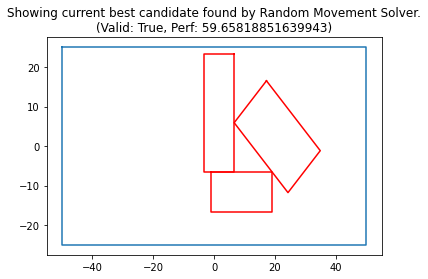

In [15]:
# Display (after running solver)
e.display_environment()

### What's next?

- In terms of OOP and optimization design
  - New shapes for buildings and environments? (Right now, only rectangular)
  - New constraints and objective/performance functions? (Right now, very simplistic)
- What other mutations can be considered?
  - Would it make sense to mutate by rotating the buildings randomly, on top of the centroids moving?
  - Would it make sense to mutate by swapping the position of two buildings, sometimes?
  - Could the current mutation lead to a solver "stuck" with an inefficient solution as the current best candidate? How to detect it and possibly avoid it?
- Can we use a smarter mutation procedure than just moving randomly? 
  - Lots of rejects when randomly mutating, this is a waste of time for the solver.
  - Could we come up with a procedure that tells us an "approximate good" direction in which we could move?
  - E.g., maybe moving the buildings in a few directions, with a small step and compute an approximate gradient for the objective/performance function that we could use to improve our chances of producing a better candidate on each iteration?
- How to decide on a number of iterations?
  - Can we stop early if we feel we have found a good candidate?
  - Can we add more iterations if we detect there is still room for improvement?